In [1]:
!pip install robin_stocks
import robin_stocks.robinhood as r
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt

Library: [robin_stocks](https://readthedocs.org/projects/robin-stocks/downloads/pdf/latest/)

## Authentication and Login

In [2]:
login = r.login('kgraghav@mtu.edu','0214@Kgraghavan',store_session=True)

## List of Cryptocurrencies available

In [3]:
crypto_info=r.crypto.get_crypto_currency_pairs()
crypto_list=[]
for i in range(len(crypto_info)):
    crypto_list.append(crypto_info[i]['asset_currency']['code'])

## Read in Portfolio

In [4]:
df_portfolio=pd.read_csv('portfolio.csv')
df_portfolio.set_index('Parameters',inplace=True)
columns_list=df_portfolio.columns.tolist()
columns_dict={}
for stock in columns_list:
    stock_str_rep=stock.replace('-','.')
    columns_dict[stock]=stock_str_rep
df_portfolio.rename(columns=columns_dict,inplace=True)
df_portfolio.sort_values(by='weight',axis=1,ascending=False)

,FCEL,TSLA,MRNA,NVDA,AMD,AAPL,INO,MSFT,PAAS,SPCE,...,ARKG,NFLX,AMZN,ARKK,QQQ,XLK,IEF,SOXX,GOVT,NIO
Parameters,,,,,,,,,,,,,,,,,,,,,
reward,313.176175,217.710025,221.754867,163.856043,166.605813,118.633281,152.010969,89.574679,116.988870,183.516317,...,81.421826,80.944206,71.713480,72.066669,58.646598,61.026616,37.573204,62.256834,32.206418,88.518306
risk,1.381594,1.207319,1.478382,1.128912,1.235212,1.298055,1.729082,1.254931,1.675276,3.052411,...,2.043021,2.204634,1.960728,2.152841,1.767085,1.840039,1.271031,2.233625,1.258355,3.517537
returns_ratio,226.677508,180.325154,149.998405,145.145045,134.880333,91.393131,87.914240,71.378196,69.832610,60.121753,...,39.853646,36.715484,36.574923,33.475147,33.188320,33.165934,29.561199,27.872551,25.594055,25.164857
weight,0.099704,0.079316,0.065977,0.063842,0.059327,0.040199,0.038669,0.031396,0.030716,0.026444,...,0.017530,0.016149,0.016087,0.014724,0.014598,0.014588,0.013002,0.012260,0.011258,0.011069
price_bound,1.287320,63.032470,28.996914,16.427897,12.516330,17.224159,10.299373,26.739999,8.470091,12.648753,...,12.591985,119.028697,570.969878,15.859678,37.198929,17.000672,6.919617,54.432019,1.315372,3.192472
suggested_investment,698.025932,555.289473,461.901922,446.956589,415.347652,281.434079,270.721256,219.800511,215.041067,185.137658,...,122.724477,113.060885,112.628045,103.082661,102.199411,102.130478,91.030132,85.830146,78.813794,77.492130


In [5]:
port_stocks=df_portfolio.columns.tolist()

Total suggested equity value is: 6348.778218868155


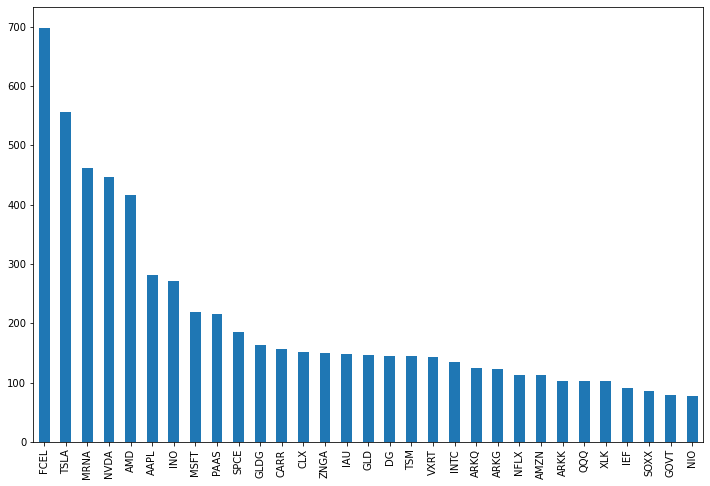

In [6]:
df_suggested_equity=df_portfolio.loc['suggested_investment',:]
df_suggested_equity.transpose().plot(kind='bar',figsize=(12,8));
total_port_equity=df_suggested_equity.sum()
print('Total suggested equity value is: {}'.format(total_port_equity))


## Print total stocks value

In [7]:
stocks_dict=r.account.build_holdings()
#print('Stocks are: {}'.format(stocks_dict))
tickers=stocks_dict.keys()
ticker_list=list(tickers)
for ticker in ticker_list:
    ticker.replace('-','.')
print(ticker_list)
###### Get crypto positions #####
crypto_holdings=r.get_crypto_positions()
print(float(crypto_holdings[3]['quantity']))

['VXRT', 'ZNGA', 'MSFT', 'NVDA', 'INO', 'NIO', 'TSLA', 'AMD', 'AAPL', 'NFLX', 'GLD', 'MRNA', 'GLDG', 'AMZN', 'PAAS', 'SPCE', 'TSM', 'INTC', 'ARKK', 'ARKG', 'GOVT', 'CLX', 'ARKQ', 'DG', 'CARR', 'FCEL', 'QQQ', 'XLK', 'IEF', 'SOXX', 'IAU']
0.0


In [8]:
price_list=[float(stocks_dict[ticker]['equity']) for ticker in ticker_list]
for i in range(len(crypto_holdings)):
    if float(crypto_holdings[i]['quantity'])>0:
        crypto_ticker=crypto_holdings[i]['currency']['code'].replace('-USD','')
        crypto_qty=float(crypto_holdings[i]['quantity'])
        crypto_mark_price=float(r.get_crypto_quote(symbol=crypto_ticker,info='mark_price'))
        crypto_price=crypto_qty*crypto_mark_price
        price_list.append(crypto_price)
        ticker_list.append('{}.USD'.format(crypto_holdings[i]['currency']['code']))

## Stocks common to portfolio and investment

In [9]:
comm_stocks=list(set(port_stocks).intersection(set(ticker_list)))
print('Stocks common to recommended and actual portfolio: ',comm_stocks)
port_stocks=[stock.replace('-','.') for stock in port_stocks]

Stocks common to recommended and actual portfolio:  ['GLD', 'AMD', 'TSM', 'PAAS', 'TSLA', 'INO', 'CLX', 'XLK', 'SOXX', 'IAU', 'ARKQ', 'NIO', 'NVDA', 'QQQ', 'MSFT', 'VXRT', 'SPCE', 'INTC', 'ZNGA', 'DG', 'CARR', 'MRNA', 'FCEL', 'GOVT', 'IEF', 'ARKG', 'AMZN', 'NFLX', 'GLDG', 'AAPL', 'ARKK']


## Stocks not common

### Stock in recommended portfolio but not in actual portfolio

In [10]:
not_in_ticker_list=[stock for stock in port_stocks if stock not in ticker_list]
not_in_ticker_list

[]

### Stock in  actual portfolio but not in recommended portfolio

In [11]:
not_in_port_stocks=[ticker for ticker in ticker_list if ticker not in port_stocks]
not_in_port_stocks

[]

## Share Price

In [12]:
share_price={}
share_price_values=[float(stocks_dict[ticker]['price']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_price[ticker]=share_price_values[i]
share_price=pd.DataFrame(share_price,index=['price'])
share_price

,VXRT,ZNGA,MSFT,NVDA,INO,NIO,TSLA,AMD,AAPL,NFLX,...,CLX,ARKQ,DG,CARR,FCEL,QQQ,XLK,IEF,SOXX,IAU
price,4.775,9.175,306.52,240.9979,3.73,23.84,914.3516,121.76,172.279,406.145,...,140.92,63.97,201.85,45.69,4.265,356.78,159.21,111.23,471.88,34.3465


## Share Quantity

In [13]:
share_quantity={}
share_quantities=[float(stocks_dict[ticker]['quantity']) for ticker in tickers]
for i in range(len(tickers)):
    ticker=ticker_list[i]
    share_quantity[ticker]=share_quantities[i]
share_quantity=pd.DataFrame(share_quantity,index=['quantity'])
share_quantity

,VXRT,ZNGA,MSFT,NVDA,INO,NIO,TSLA,AMD,AAPL,NFLX,...,CLX,ARKQ,DG,CARR,FCEL,QQQ,XLK,IEF,SOXX,IAU
quantity,30.11,16.3,0.7203,1.85,73.37,3.24,0.6137,3.41,1.63,0.2817,...,1.07,1.95,0.7236,3.46,162.33,0.2865,0.6421,0.8185,0.1816,4.31


## Total Equity

Total Stocks equity value is: 6350.239999999999
Total Common Stocks equity value is: 6350.239999999999


,FCEL,TSLA,MRNA,NVDA,AMD,AAPL,INO,MSFT,PAAS,SPCE,...,ARKG,NFLX,AMZN,ARKK,XLK,QQQ,IEF,SOXX,GOVT,NIO
Equity,692.34,561.14,462.33,445.85,415.2,280.81,273.67,220.79,213.74,183.86,...,122.09,114.41,113.49,103.49,102.23,102.22,91.04,85.69,78.73,77.24


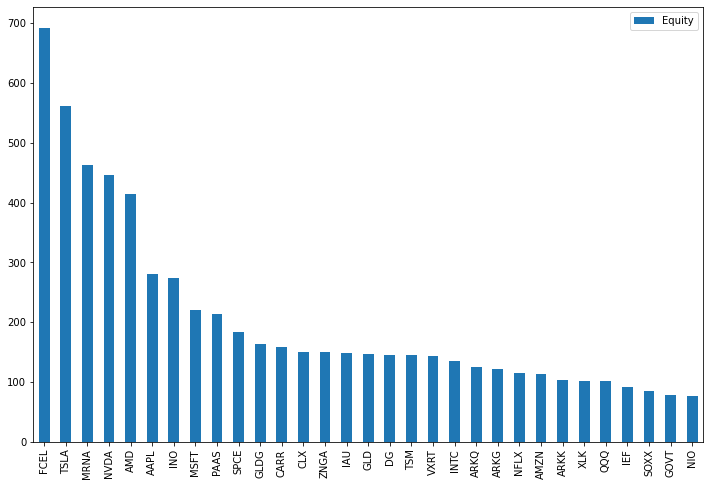

In [14]:
equity={}
total_equity=0
for i in range(len(ticker_list)):
    ticker=ticker_list[i]
    equity[ticker]=price_list[i]
    total_equity=total_equity+equity[ticker]
print('Total Stocks equity value is: {}'.format(total_equity))

equity_comm={}
total_comm_equity=0
for i in range(len(comm_stocks)):
    ticker=comm_stocks[i]
    equity_comm[ticker]=price_list[i]
    total_comm_equity=total_comm_equity+equity_comm[ticker]
print('Total Common Stocks equity value is: {}'.format(total_comm_equity))

df_equity=pd.DataFrame.from_dict(data=equity,orient='index',columns=['Equity'])
df_plot=df_equity.sort_values(by='Equity',axis=0,ascending=False)
if df_plot.shape[0]>0:
    df_plot.plot(kind='bar',figsize=(12,8))
else:
    print('no data to plot')
df_equity=df_equity.transpose()
df_equity.sort_values(by='Equity',axis=1,ascending=False)

## Equity Change

Total Common equity change value is: 1.461781131845953
Total Common Change Percent is: 0.023024605387878174
                        TSLA       INO      NFLX      MSFT      AMZN  \
Equity_Comm_Change  5.850527  2.948744  1.349115  0.989489  0.861955   

                        CARR       DG       TSM      MRNA      ARKK  ...  \
Equity_Comm_Change  0.699323  0.64611  0.622343  0.428078  0.407339  ...   

                        NIO      GLDG      INTC      AAPL      ARKG      NVDA  \
Equity_Comm_Change -0.25213 -0.320037 -0.448744 -0.624079 -0.634477 -1.106589   

                        SPCE      PAAS       CLX      FCEL  
Equity_Comm_Change -1.277658 -1.301067 -1.564802 -5.685932  

[1 rows x 31 columns]


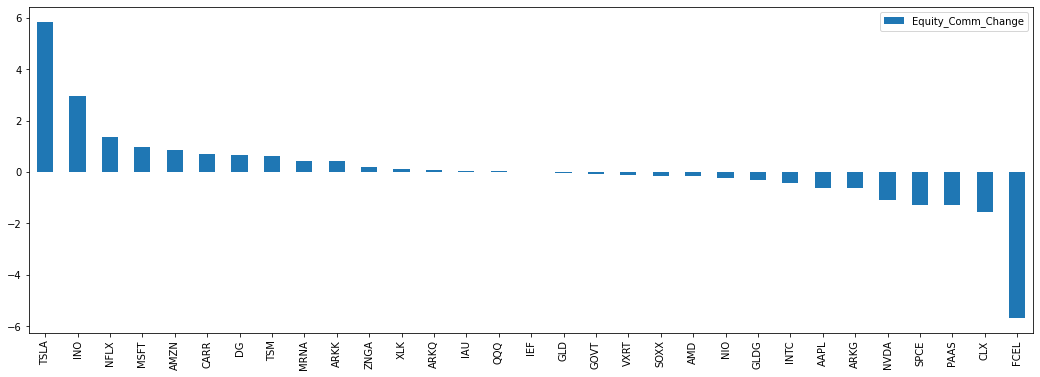

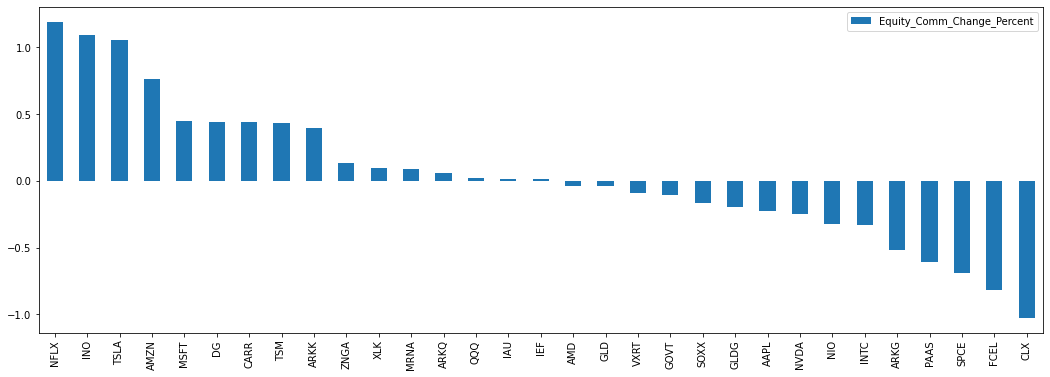

In [15]:
if len(ticker_list)>0:
    equity_change={}
    total_port_equity_change=0
    for i in range(len(ticker_list)):
        stock=ticker_list[i]
        if stock in df_equity.columns.tolist() and stock in df_suggested_equity.index.tolist():
            equity_change[stock]=df_equity.loc['Equity',stock]-df_suggested_equity[stock]
            total_port_equity_change=total_port_equity_change+equity_change[stock]

    equity_change_percent=total_port_equity_change/total_port_equity*100
    df_equity_change=pd.DataFrame.from_dict(data=equity_change,orient='index',columns=['Equity_Change']).transpose()
    df_equity_change_ratio=pd.DataFrame(df_equity_change.
                                 div(df_suggested_equity))
    df_equity_change_percent=df_equity_change_ratio*100
    df_equity_change_ratio.rename(index={'Equity_Change':'Equity_Change_Ratio'},inplace=True)
    df_equity_change_percent.rename(index={'Equity_Change':'Equity_Change_Percent'},inplace=True)

    if len(comm_stocks)>0:
        equity_comm_change={}
        total_equity_comm_change=0
        for i in range(len(comm_stocks)):
            comm_stock=comm_stocks[i]
            equity_comm_change[comm_stock]=df_equity.loc['Equity',comm_stock]-df_suggested_equity[comm_stock]
            total_equity_comm_change=total_equity_comm_change+equity_comm_change[comm_stock]
        print('Total Common equity change value is: {}'.format(total_equity_comm_change))


        equity_comm_change_percent=total_equity_comm_change/total_port_equity*100
        print('Total Common Change Percent is: {}'.format(equity_comm_change_percent))

        df_equity_comm_change=pd.DataFrame.from_dict(data=equity_comm_change,orient='index',columns=['Equity_Comm_Change']).transpose()
        df_equity_comm_change_ratio=pd.DataFrame(df_equity_comm_change.
                                         div(df_suggested_equity))
        df_equity_comm_change_percent=df_equity_comm_change_ratio*100
        df_equity_comm_change_ratio.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Ratio'},inplace=True)
        df_equity_comm_change_percent.rename(index={'Equity_Comm_Change':'Equity_Comm_Change_Percent'},inplace=True)
        ############################ Plots #####################################
        df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
        print(df_equity_comm_change.sort_values(by='Equity_Comm_Change',axis=1,ascending=False))
        df_equity_comm_change_percent.sort_values(by='Equity_Comm_Change_Percent',axis=1,ascending=False).transpose().plot(kind='bar',figsize=(18,6));
    else:
        print('no common stocks')

else:
    print('no positions')

## Update Stop Loss

### Stop Loss Sell Limit Price

### Cancel Existing Stock Orders

### Update Stop Loss Sell orders for all stocks

## Sell and Buy Stocks

### Sell all portfolio stocks

### Sell all stocks

### Buy Portfolio Stocks

#### 